In [1]:
import xgboost
import joblib
import numpy as np
from sklearn.metrics import accuracy_score
from quadratic_weighted_kappa import quadratic_weighted_kappa
import pandas as pd

In [2]:
#x = joblib.load('essay_ease10_sbert768_simbow_langerr_780')
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap6')
y = joblib.load("score_asap6")

In [25]:
x_12 = x[:, :12]
x_sbert = x[:, 12:]
print(x_12.shape)
print(x_sbert.shape)

(1800, 12)
(1800, 768)


In [22]:
x = x_12
x.shape

(1800, 12)

In [3]:
def get_feature_names_extended():
    ease_feats = ['Answer Length', 'Word Counts', 'Average Word Length', 'Good n-gram', 'Prompt Overlap',
              'Prompt Overlap (synonyms)', 'Punctuation Counts', 'Spelling Error', 'Unique Words', 'Prompt Similarity SBert']

    sbert_feats = []
    sbert_dim = 768

    for i in range(0, sbert_dim):
    	fname = "sbert_" + str(i) 
    	sbert_feats.append(fname)
    
    prompt_similarity_bow = ["Prompt Similarity BOW"]
    lang_error = ["Language Error"]
    
    feature_names = ease_feats + prompt_similarity_bow + lang_error + sbert_feats 

    print("len feature names: ", len(feature_names))
    
    return feature_names

feature_names = get_feature_names_extended()[:12]

len feature names:  780


In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
#kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#kf.get_n_splits(x, y)
print(kf)

KFold(n_splits=5, random_state=42, shuffle=True)


In [5]:
model2 = xgboost.XGBRegressor(objective ='reg:squarederror',
                colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.05,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [14]:
qwk_scores = []

test_indices = []
pred_labels = []

for train_index, test_index in kf.split(x, y):
#     print("train_index: ", len(train_index))
#     print("test_index: ", len(test_index))
#     print("train_index: ", train_index[:20])
#     print("test_index: ", test_index[:20])
    
    X_train, X_test, Y_train, Y_test = x[train_index], x[test_index], y[train_index], y[test_index]

    #d_train = xgboost.DMatrix(X_train, label=Y_train, feature_names=feature_names)
    #d_test = xgboost.DMatrix(X_test, label=Y_test, feature_names=feature_names)
         
    model2.fit(X_train, Y_train)
    
    #rf.fit(X_train, Y_train)
    
    #predict = model.predict(d_test)
    predict = model2.predict(X_test)
    #predict = rf.predict(X_test)
    predict = np.round(predict)
    
    pred_labels.extend(predict)
    test_indices.extend(test_index)

    result = quadratic_weighted_kappa(Y_test, predict)
    
    print("Qwk : ", result)
    
    qwk_scores.append(result)
    
    
np.mean(qwk_scores)

Qwk :  0.8260045489006823
Qwk :  0.7988882527839849
Qwk :  0.8027769012306721
Qwk :  0.7795355099293168
Qwk :  0.7854984894259819


0.7985407404541276

In [15]:
print(len(pred_labels))
print(len(test_indices))

1800
1800


In [16]:
pred_labels_int = list(map(int, pred_labels))
print(pred_labels)
print(pred_labels_int)

[4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 4.0, 3.0, 1.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 3.0, 1.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 0.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 4.0, 1.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, 1.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 0.0, 2.0,

In [17]:
new_score = np.zeros(1800)
new_score

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
new_score[test_indices] = pred_labels_int
#new_score[test_indices] = pred_labels

In [19]:
new_score

array([3., 4., 4., ..., 3., 2., 2.])

In [12]:
new_score[60]

4.0

In [37]:
joblib.dump(new_score, 'score_model_normalized')

['score_model_normalized']

In [12]:
# Save the original score in floating number
joblib.dump(new_score, 'score_model_normalized_float')

['score_model_normalized_float']

In [13]:
quadratic_weighted_kappa(y, new_score)

0.7982639655911743

In [18]:
print(test_indices[:100])

[23, 29, 30, 32, 44, 49, 51, 59, 65, 67, 69, 70, 71, 73, 76, 78, 99, 109, 111, 115, 123, 124, 135, 141, 162, 168, 170, 173, 184, 185, 188, 196, 203, 210, 212, 220, 233, 237, 239, 240, 244, 247, 250, 251, 254, 259, 261, 270, 271, 275, 289, 297, 298, 300, 303, 305, 307, 316, 322, 324, 331, 332, 339, 342, 344, 350, 351, 352, 354, 365, 366, 367, 371, 374, 381, 382, 383, 394, 398, 408, 411, 413, 414, 415, 420, 425, 426, 429, 432, 433, 438, 439, 450, 462, 471, 480, 481, 482, 483, 494]


In [30]:
index_fold1 = test_indices[:360]
index_fold2 = test_indices[360:720]
index_fold3 = test_indices[720:1080]
index_fold4 = test_indices[1080:1440]
index_fold5 = test_indices[1440:]

In [31]:
print(index_fold1)

[23, 29, 30, 32, 44, 49, 51, 59, 65, 67, 69, 70, 71, 73, 76, 78, 99, 109, 111, 115, 123, 124, 135, 141, 162, 168, 170, 173, 184, 185, 188, 196, 203, 210, 212, 220, 233, 237, 239, 240, 244, 247, 250, 251, 254, 259, 261, 270, 271, 275, 289, 297, 298, 300, 303, 305, 307, 316, 322, 324, 331, 332, 339, 342, 344, 350, 351, 352, 354, 365, 366, 367, 371, 374, 381, 382, 383, 394, 398, 408, 411, 413, 414, 415, 420, 425, 426, 429, 432, 433, 438, 439, 450, 462, 471, 480, 481, 482, 483, 494, 495, 497, 506, 514, 518, 526, 527, 529, 530, 532, 534, 535, 538, 543, 544, 551, 554, 555, 561, 570, 582, 583, 589, 590, 591, 593, 598, 602, 610, 611, 614, 617, 618, 619, 620, 628, 643, 650, 651, 654, 660, 670, 678, 680, 682, 700, 701, 705, 710, 715, 721, 733, 745, 754, 755, 765, 767, 771, 772, 777, 780, 782, 785, 787, 802, 813, 817, 818, 843, 844, 845, 846, 849, 855, 857, 864, 867, 869, 881, 886, 892, 898, 901, 903, 907, 909, 917, 937, 938, 941, 942, 943, 948, 949, 962, 966, 968, 988, 997, 998, 1004, 1007, 1013

In [21]:
indices = np.arange(1800)
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test, idx1, idx2 = train_test_split(x, y, indices, test_size=0.2, random_state=42)

In [23]:
idx2

array([1591,  943,  869,  162, 1271,   70,  247,  322, 1659, 1004, 1662,
        909, 1225,  901,  591, 1273,  554, 1061,  529, 1719,  721,  561,
        538, 1253,  495,  650,  715,  530, 1573, 1582, 1723, 1298,  471,
       1344,  289, 1561, 1633,  619, 1427,  660, 1486, 1355, 1740,  352,
        551,   65, 1348,  324, 1134, 1643,  251, 1353,  610, 1370,  678,
       1336, 1339,   29, 1121, 1709,  135,  651, 1649,  680, 1672, 1454,
       1493, 1310,  555, 1595,  382,  173,  109,  570,  535, 1604, 1027,
        864,  239,  111, 1660,  948,  589,  817,   23, 1567, 1789, 1255,
        518,  429,  654,  331,  188, 1725,  383,  438, 1775,  590,  210,
        220,  203,  439, 1619, 1517, 1741,  582, 1733,  483, 1249,  782,
        481,  514,  949,  968,  611,  802,  527,  767,  598,  115,  506,
        544,  350, 1387, 1717, 1751, 1050, 1201,  275,  344, 1776, 1216,
        710,  342, 1196,  482,  886,  332, 1165,  124,  543, 1124,   49,
       1211,  426,  700, 1160, 1777,  892, 1164, 15

In [24]:
asap6 = pd.read_csv('training_set_6_final.txt', sep='\t', encoding = "ISO-8859-1")

In [25]:
asap6['essay'][1274]

'In attempting to build a working mooring dock for dirigibles on the Empire State Building the works set themselves a hard task. First they had to make sixty thousand dollars worth of modifications so that the building would withstand the weight and added wind pressure of a moored dirigible. Also, a prexisting law made it immpossible for dirigibles to come as low to the city as they needed to be to dock. Finally constant changes in wind current and other weather made a safe docking at the Empire State Building nearly impossible because the dirigible might get blown into the sharp roofs of nearby buidings and instead of being weighted down by lead like they would when they landed in fields as they normally would, they would be tied up, dangling over pedestrians.'

In [48]:
asap6_fold1 = pd.read_csv('asap6_test_set_fold1.txt', sep='\t', encoding = "ISO-8859-1")
asap6_fold1_paraphrase = pd.read_csv('asap6_test_set_paraphrased_fold1.txt', sep='\t', encoding = "ISO-8859-1")

In [49]:
asap6_fold1['idx'] = idx2
asap6_fold1['essay_paraphrase'] = asap6_fold1_paraphrase['essay']

# REORDER COLUMNS
asap6_fold1 = asap6_fold1[['idx', 'essay', 'essay_paraphrase', 'domain1_score']]
asap6_fold1

,idx,essay,essay_paraphrase,domain1_score
0,1591,The builders of the Empire State Building face...,The developers of the Empire State Building co...,3
1,943,Many obstacles occured for the builers of the ...,Numerous impediments occured for the builers o...,3
2,869,While attempting to allow dirigibles to dock o...,While endeavoring to permit blimps to dock on ...,4
3,162,The builders came across many obstacles while ...,The manufacturers went over numerous snags whi...,2
4,1271,When the Empire State Building was @NUM1 conce...,At the point when the Empire State Building wa...,3
...,...,...,...,...
355,765,In the excerpt 'The Mooring Mast' by @ORGANIZA...,In the portion 'The Mooring Mast' by @ORGANIZA...,2
356,1465,There were many obstacles the builders of the ...,There were numerous impediments the manufactur...,3
357,1734,The builders of the Empire State Building were...,The manufacturers of the Empire State Building...,4
358,1269,the obstacles the builders of the Empire State...,the impediments the manufacturers of the Empir...,0


In [55]:
asap6_fold1.sort_values(by='idx', ignore_index=True, inplace=True)
asap6_fold1

,idx,essay,essay_paraphrase,domain1_score
0,23,The builders of the Empire State Building face...,The manufacturers of the Empire State Building...,4
1,29,The builders of the Empire State Building face...,The manufacturers of the Empire State Building...,3
2,30,"While building the Empire State Building, work...","While building the Empire State Building, labo...",4
3,32,the obstacles the builders went threw was usin...,the hindrances the manufacturers went tossed w...,2
4,44,"From the excerpt, The Mooring Mast, the archit...","From the extract, The Mooring Mast, the archit...",2
...,...,...,...,...
355,1777,"After finishing the @ORGANIZATION1, architects...","In the wake of completing the @ORGANIZATION1, ...",3
356,1779,"While constructing the Empire State Building, ...","While developing the Empire State Building, th...",3
357,1781,There were many obstacles which the builders o...,There were numerous obstructions which the dev...,2
358,1787,The builders and architects of the Empire Stat...,The developers and designers of the Empire Sta...,3


In [57]:
joblib.dump(asap6_fold1, 'asap6_fold1_paraphrased')

['asap6_fold1_paraphrased']

### Separate each fold

In [58]:
#asap6_fold1 = asap6.loc[index_fold1]
asap6_fold2 = asap6.loc[index_fold2]
asap6_fold3 = asap6.loc[index_fold3]
asap6_fold4 = asap6.loc[index_fold4]
asap6_fold5 = asap6.loc[index_fold5]

In [70]:
asap6_fold4['idx'] = asap6_fold4.index
asap6_fold4

,essay,domain1_score,idx
4,The builders of the Empire State Building face...,3,4
9,The builders of the Empire State Building a gr...,3,9
11,During the construction of the Empire State Bu...,4,11
16,"In Marcia Amidon Lüsted's excerpt, The Mooring...",1,16
17,The builders of the empire state buildings had...,3,17
...,...,...,...
1784,"In the @CAPS1, the docking of dirigibles had m...",1,1784
1791,The builders of the Empire State Building were...,2,1791
1793,The builders of the Empire State building had ...,3,1793
1797,The builders of the Empire State building face...,3,1797


In [71]:
asap6_fold4.reset_index(drop=True, inplace=True)
asap6_fold4 = asap6_fold4[['idx', 'essay', 'domain1_score']]
asap6_fold4

,idx,essay,domain1_score
0,4,The builders of the Empire State Building face...,3
1,9,The builders of the Empire State Building a gr...,3
2,11,During the construction of the Empire State Bu...,4
3,16,"In Marcia Amidon Lüsted's excerpt, The Mooring...",1
4,17,The builders of the empire state buildings had...,3
...,...,...,...
355,1784,"In the @CAPS1, the docking of dirigibles had m...",1
356,1791,The builders of the Empire State Building were...,2
357,1793,The builders of the Empire State building had ...,3
358,1797,The builders of the Empire State building face...,3


In [72]:
joblib.dump(asap6_fold4, 'asap6_fold4')

['asap6_fold4']

### Save to txt

In [90]:
saveTxt = asap6_fold5[['essay','domain1_score']]
type(saveTxt)

pandas.core.frame.DataFrame

In [91]:
saveTxt.to_csv('asap6_test_set_fold5.txt', sep='\t', index=None)

### Model Interpretation

In [3]:
model = joblib.load('model_asap6_extended_780_normalized')

In [4]:
imp_vals = model.get_fscore()
#print(imp_vals)
feature_important = model.get_score(importance_type='weight')
feats_sorted = sorted(feature_important.items(), key=lambda x: x[1], reverse=True)
aa_25 = feats_sorted[:25]

In [5]:
x_axis = [i[0] for i in aa_25]
y_axis = [i[1] for i in aa_25]

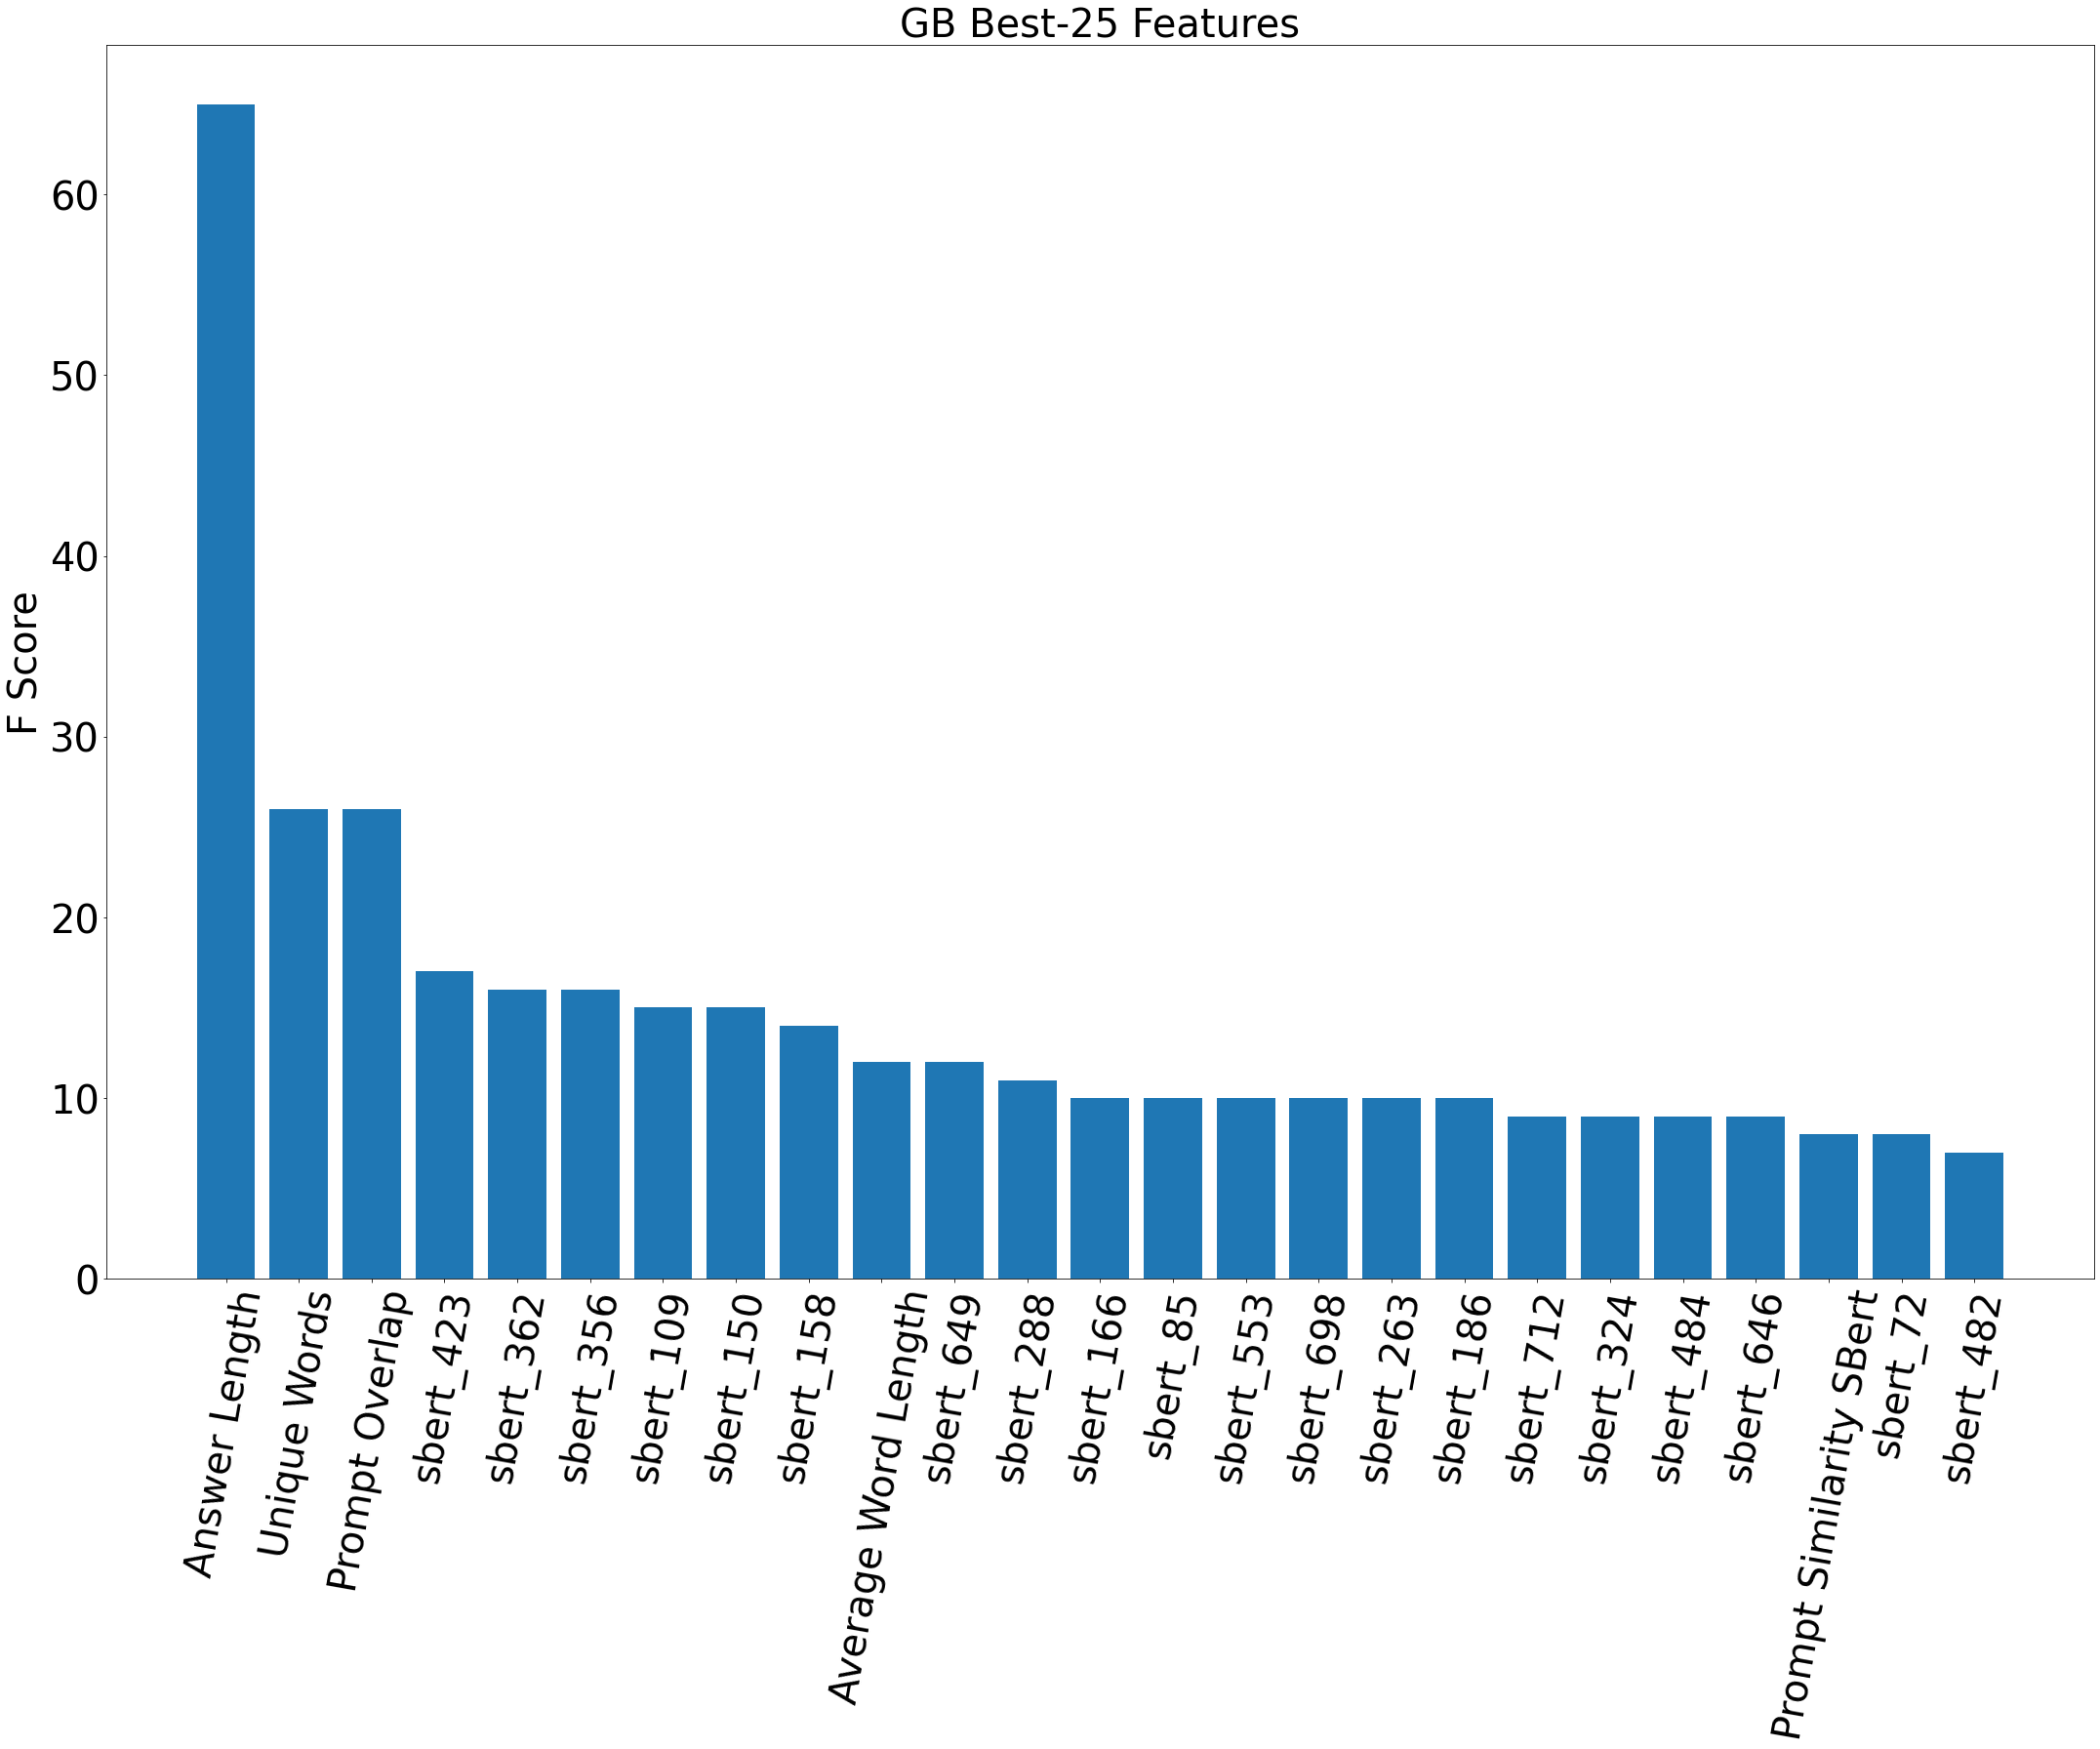

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,25))
plt.title("GB Best-25 Features", fontsize=40)
plt.bar(x_axis, y_axis, width=0.8, align='center')
plt.xticks(x_axis, fontsize=40, rotation=80)
plt.ylabel("F Score", fontsize=40)
plt.yticks(fontsize=40)
plt.tight_layout()
#plt.savefig('gb_best_25.png')
plt.show()

In [8]:
import shap
explainer = shap.TreeExplainer(model)